In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('IMDB Dataset.csv')
dt.sample(5)

,review,sentiment
9180,Starring: James Belushi; Peter Dinklage; Alex ...,negative
27168,Most people get the luxury of typing in the ti...,negative
15252,This was a quite brutal movie. There were huge...,negative
8238,Little Dieter Needs to Fly was my first film d...,positive
35111,If you're looking for an accurate portrayal of...,negative


In [3]:
dt['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

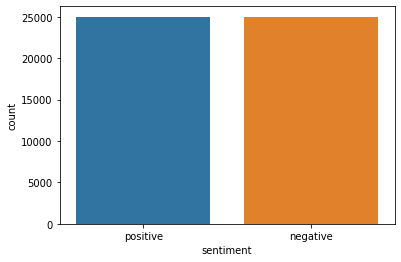

In [4]:
sns.countplot(x=dt['sentiment'])
plt.show()

In [5]:
import re
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    return text

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dt['sentiment'])
y = le.transform(dt['sentiment'])

In [7]:
le.inverse_transform([[1]])

c:\Users\NANDHINI\anaconda3\envs\DL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['positive'], dtype=object)

In [8]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
X = dt['review'].apply(normalize_text)

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [11]:
tr = Tokenizer(num_words=1000)
tr.fit_on_texts(X)


In [12]:
t2s = tr.texts_to_sequences(X)
np.array(t2s).shape

C:\Users\NANDHINI\AppData\Local\Temp\ipykernel_21976\2046377533.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(t2s).shape


(50000,)

In [13]:
np.array(t2s[30]).shape

(249,)

In [14]:
vocab_size = len(tr.word_index)+1

In [15]:
vocab_size

120795

In [16]:
max_len = 250
x_train = pad_sequences(t2s,padding='post',maxlen=max_len)

In [17]:
x_train.shape

(50000, 250)

In [18]:
x_train

array([[ 27,   4,   1, ...,   0,   0,   0],
       [  3, 390, 118, ...,   0,   0,   0],
       [ 10, 190,  11, ...,   0,   0,   0],
       ...,
       [ 10, 230,   3, ...,   0,   0,   0],
       [142, 165,   5, ...,   0,   0,   0],
       [ 54,  27,   1, ...,   0,   0,   0]])

In [19]:
x_train = x_train.reshape(50000,250,1)

In [20]:
x_train

array([[[ 27],
        [  4],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  3],
        [390],
        [118],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 10],
        [190],
        [ 11],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[ 10],
        [230],
        [  3],
        ...,
        [  0],
        [  0],
        [  0]],

       [[142],
        [165],
        [  5],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 54],
        [ 27],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]]])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [31]:
model = Sequential()
model.add(Embedding(1000,250,input_length=(250)))
model.add(SimpleRNN(250,activation='tanh'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 250)          250000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 250)               125250    
                                                                 
Total params: 375,250
Trainable params: 375,250
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(Dense(125,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 250)          250000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 250)               125250    
                                                                 
 dense_8 (Dense)             (None, 125)               31375     
                                                                 
 dense_9 (Dense)             (None, 75)                9450      
                                                                 
 dense_10 (Dense)            (None, 10)                760       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 416,846
Trainable params: 416,846
Non-tr

In [33]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(x_train,y,epochs=10,batch_size=500,validation_split=0.2)

Epoch 1/10
80/80 [==============================] - 143s 2s/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6935 - val_accuracy: 0.5038
Epoch 2/10
80/80 [==============================] - 146s 2s/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6935 - val_accuracy: 0.5027
Epoch 3/10
80/80 [==============================] - 144s 2s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6935 - val_accuracy: 0.5023
Epoch 4/10
80/80 [==============================] - 137s 2s/step - loss: 0.6929 - accuracy: 0.5074 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 5/10
80/80 [==============================] - 138s 2s/step - loss: 0.6928 - accuracy: 0.5104 - val_loss: 0.6934 - val_accuracy: 0.5081
Epoch 6/10
80/80 [==============================] - 138s 2s/step - loss: 0.6927 - accuracy: 0.5111 - val_loss: 0.6933 - val_accuracy: 0.5025
Epoch 7/10
80/80 [==============================] - 139s 2s/step - loss: 0.6926 - accuracy: 0.5148 - val_loss: 0.6933 - val_accuracy: 0.5035
Epoch 8/10
80

In [39]:
text = 'Spiderman home coming was good'
text = normalize_text(text)
text = tr.texts_to_sequences([text])

In [40]:
text

[[342, 556, 13, 49]]

In [41]:
text = pad_sequences(text,padding='post',maxlen=250)

In [42]:
text.shape

(1, 250)

In [43]:
text = text.reshape(1,250,1)

In [45]:
model.predict(text)

1/1 [==============================] - 0s 425ms/step


array([[0.5092025]], dtype=float32)

In [46]:
le.inverse_transform([[1]])

c:\Users\NANDHINI\anaconda3\envs\DL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['positive'], dtype=object)